In [54]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import palmerpenguins

In [55]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

# Cargar los datos

## Utilizando el paquete palmerpenguins 

In [56]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


## Datos previamente procesados

In [57]:
prepocess_penguins_df = palmerpenguins.load_penguins()
prepocess_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Utilizando los conjuntos de datos seaborn

In [58]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Colecta y validacion de datos

### ¿Qué tipo de datos son las variables del conjunto de datos?

In [59]:
prepocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

### ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [60]:
prepocess_penguins_df.dtypes.value_counts()

float64    4
object     3
int64      1
Name: count, dtype: int64

### ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [61]:
prepocess_penguins_df.shape

(344, 8)

### ¿Existen valores nulos explicitos en el conjunto de datos?

In [62]:
prepocess_penguins_df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

### De tener obsevaciones con valores nulos, ¿Cuantas tenemos por cada una?

In [63]:
prepocess_penguins_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

### ¿Cual es la proporcion de valores nulos por cada variable?

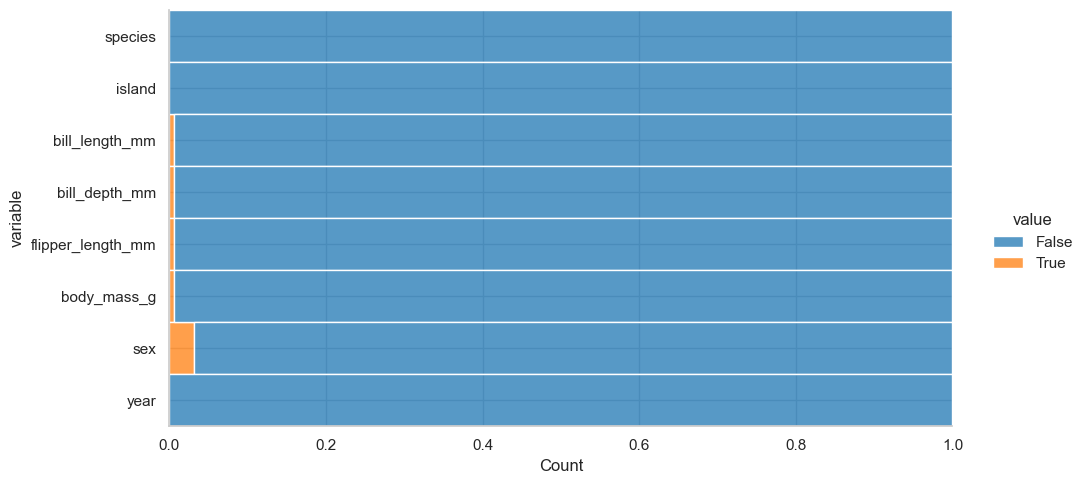

In [64]:
prepocess_penguins_df.isnull().melt().pipe(lambda df: (sns.displot(data=df, hue='value', multiple='fill', y='variable', aspect=2)))

<Axes: >

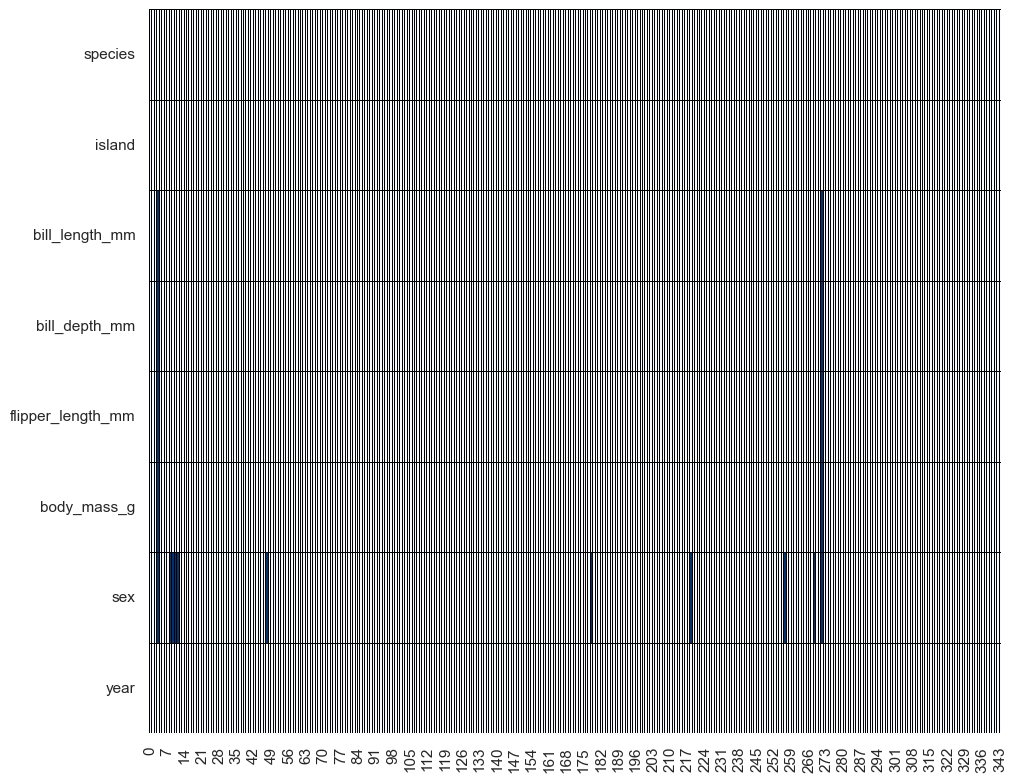

In [65]:
prepocess_penguins_df.isnull().transpose().pipe(lambda df: (sns.heatmap(data=df, cmap='Blues', cbar=False, linewidths=0.5, linecolor='black')))

In [66]:
prepocess_penguins_df.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### ¿Cuámtas observaciones perdemos si eliminamos los datos faltantes?

In [67]:
processed_penguins_df = prepocess_penguins_df.dropna()
processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Conteos y proporciones

### Preludio: ¿Qué estadisticos describen el conjunto de datos?

#### Todas las variables

In [68]:
processed_penguins_df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


#### Solo las numericas

In [69]:
processed_penguins_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


#### Solo categoricas - 1

In [70]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


#### Solo categricas 2

In [71]:
processed_penguins_df.astype({'species': 'category', 'island': 'category', 'sex': 'category'}).describe(include='category')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


## ¿Cómo visualizar los conteos?

#### Pandas


<Axes: xlabel='species'>

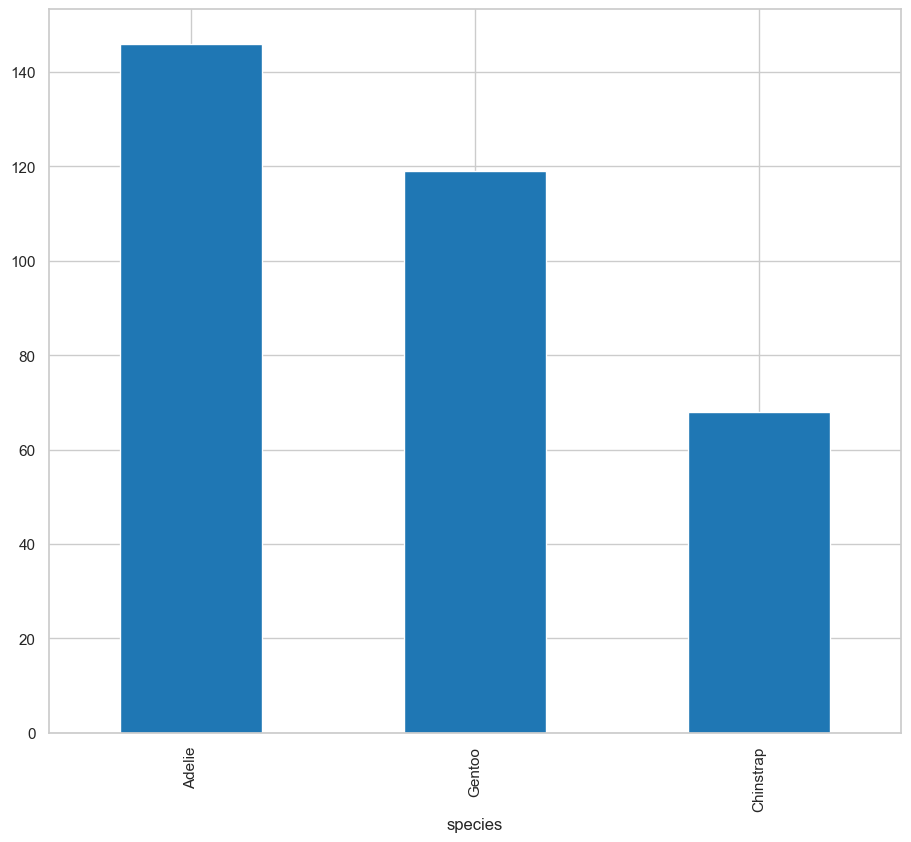

In [72]:
processed_penguins_df.species.value_counts().plot(kind='bar')

### Seaborn

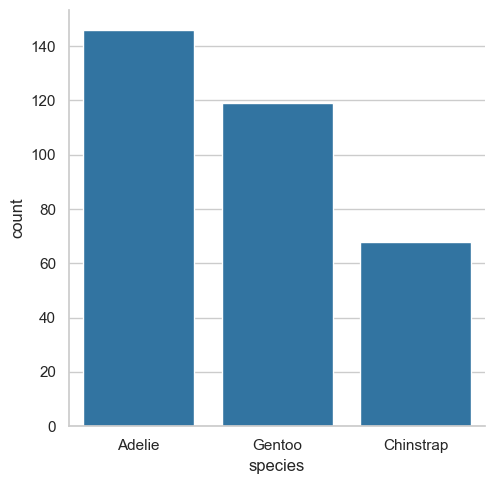

In [73]:
sns.catplot(data=processed_penguins_df, x='species', kind='count')

## Medidas de tendencia central

#### Media o promedio

In [74]:
processed_penguins_df.bill_depth_mm.mean()

np.float64(17.164864864864867)

In [75]:
np.mean(processed_penguins_df.bill_depth_mm)

np.float64(17.164864864864867)

In [76]:
processed_penguins_df.select_dtypes(include=[np.number]).mean()

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

#### Mediana

In [77]:
processed_penguins_df.select_dtypes(include=[np.number]).median()

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

#### Moda

In [78]:
processed_penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


## Medidas de dispersion

#### ¿Cuál es el valor maximo de las variables?

In [79]:
max_value = processed_penguins_df.max(numeric_only=True)

#### ¿Cuál es el valor maximo de las variables?

In [80]:
min_value =processed_penguins_df.min(numeric_only=True)

¿Cuál es el rango de las variables?

In [81]:
max_value - min_value

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

#### ¿Cuál es la desviacion estandar de las variables?

In [82]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [83]:
processed_penguins_df.mean(numeric_only=True) + processed_penguins_df.std(numeric_only=True)
processed_penguins_df.mean(numeric_only=True) - processed_penguins_df.std(numeric_only=True)

bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
year                 2007.229098
dtype: float64

#### ¿Cuál es el rango intercuartilico?

In [84]:
value_1 = processed_penguins_df.select_dtypes(include=[np.number]).quantile(0.25)
value_2 = processed_penguins_df.select_dtypes(include=[np.number]).quantile(0.75)

In [85]:
#este es el rango intercuartilico
value_2 - value_1

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

## ¿Cómo puedo visualizar la distribucion de una variable?


#### Histograma

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

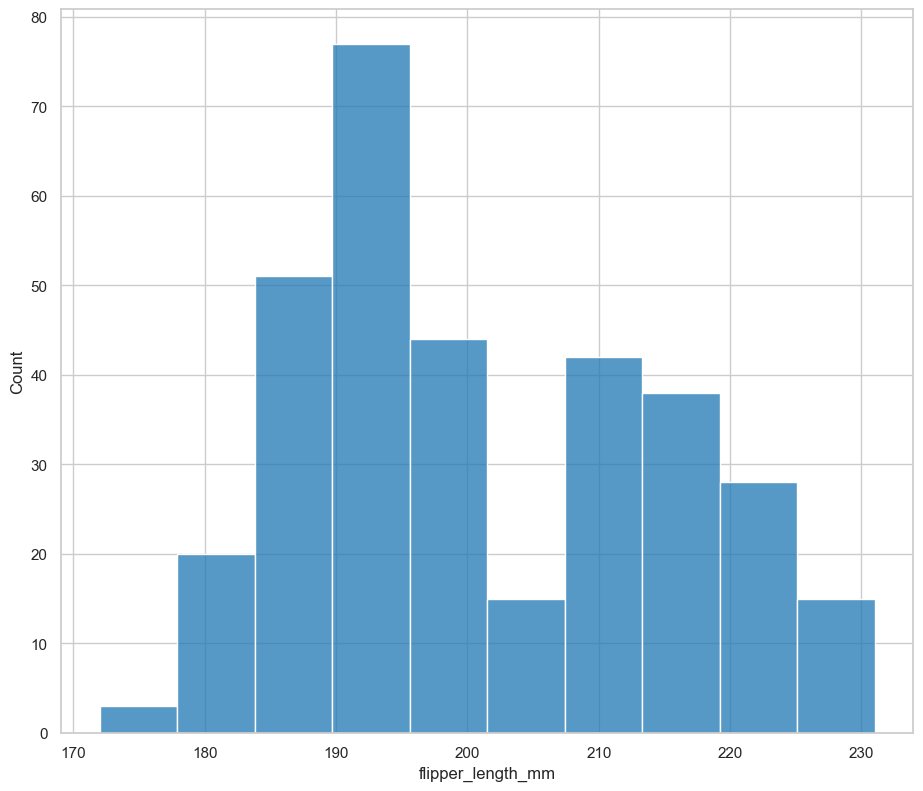

In [86]:
sns.histplot(data=processed_penguins_df, x='flipper_length_mm')

#### Diagrama de caja / boxplot

<Axes: xlabel='flipper_length_mm'>

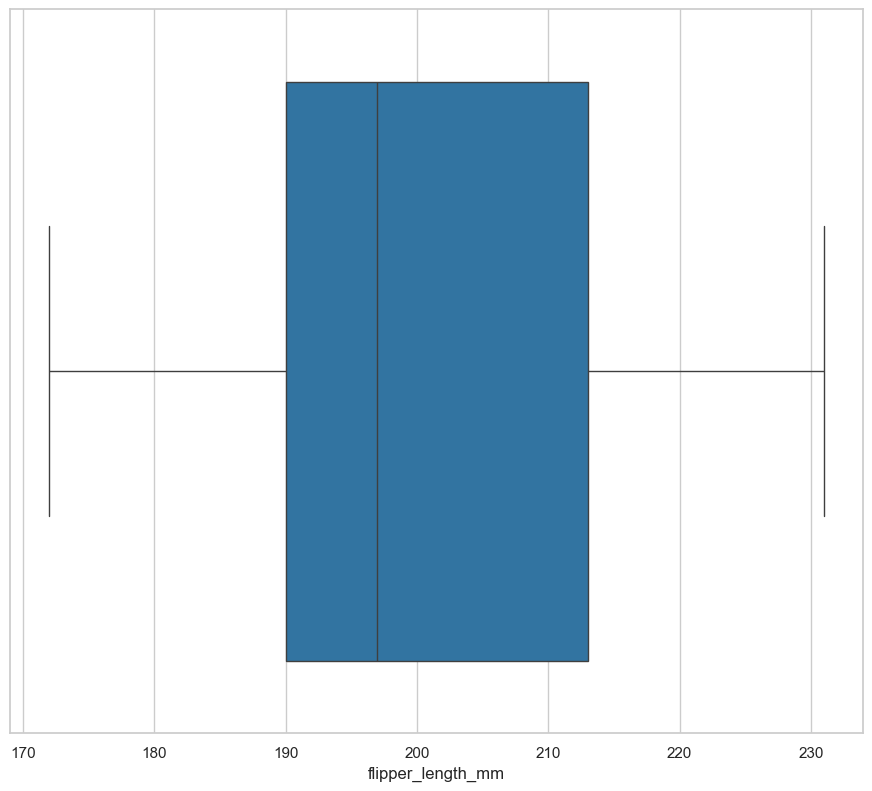

In [87]:
sns.boxplot(data=prepocess_penguins_df, x='flipper_length_mm')

## Distribuciones: PMFs, CDFs y PDFs

### Funciones de probabilidad de masas (PMFs)

#### Utilizando seaborn

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

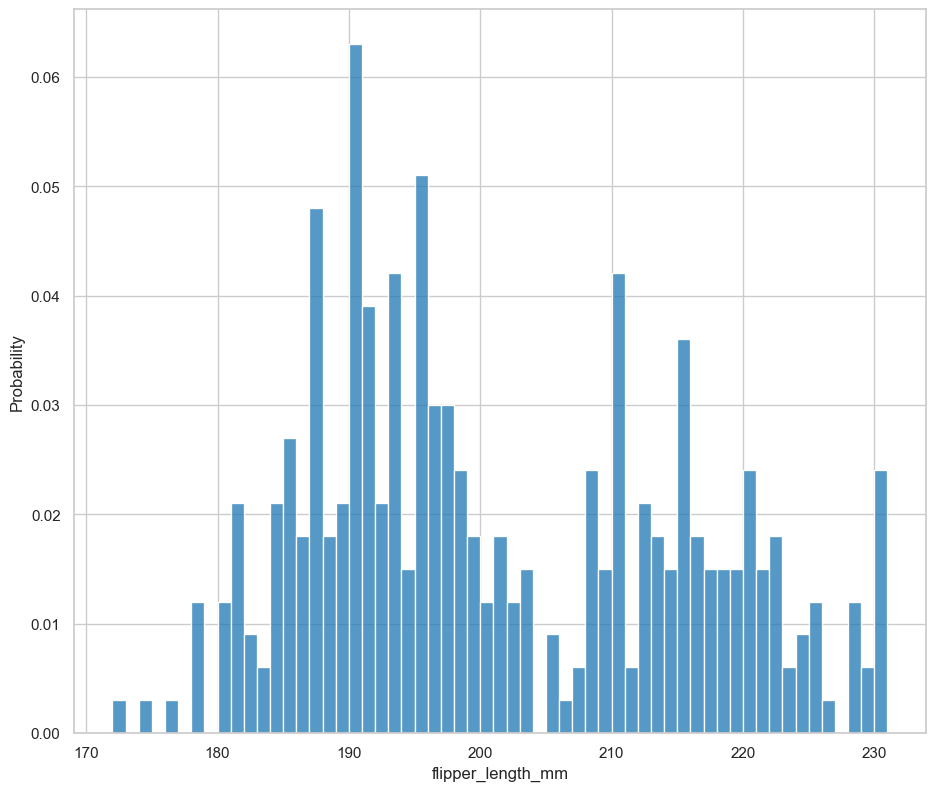

In [90]:
sns.histplot(data=processed_penguins_df, x='flipper_length_mm', binwidth=1, stat='probability')

#### Utilizando empiricaldist

In [94]:
pmf_flipper_length = empiricaldist.Pmf.from_seq(processed_penguins_df.flipper_length_mm, normalize=True)

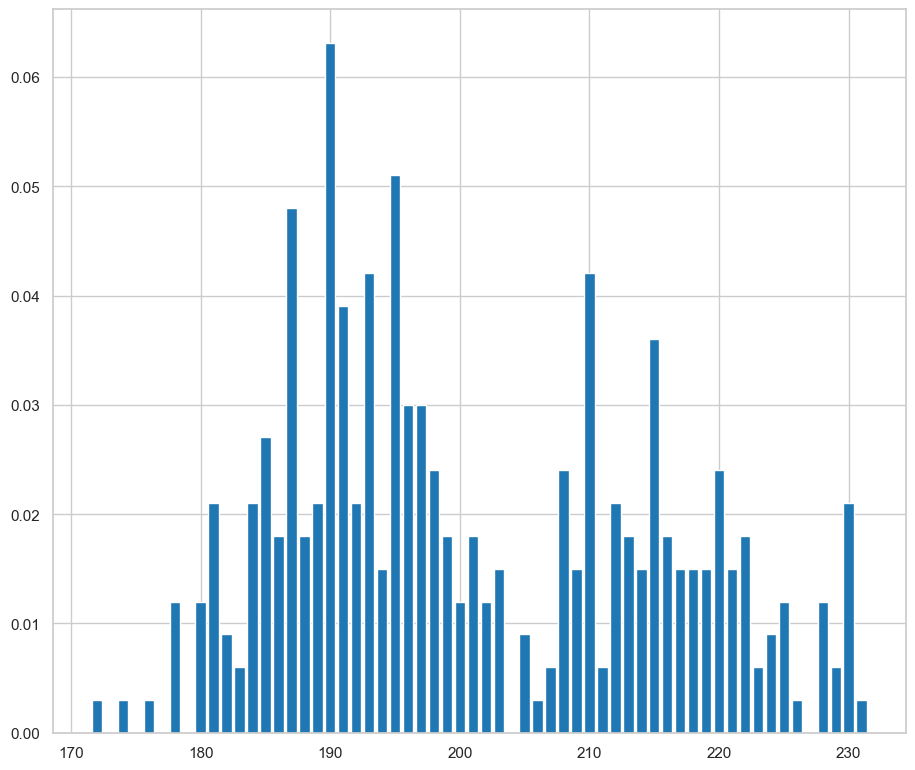

In [95]:
pmf_flipper_length.bar()

In [96]:
pmf_flipper_length(190)

np.float64(0.06306306306306306)

#### Funciones empiricas de probabilidad acumulada (ECDFs)

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

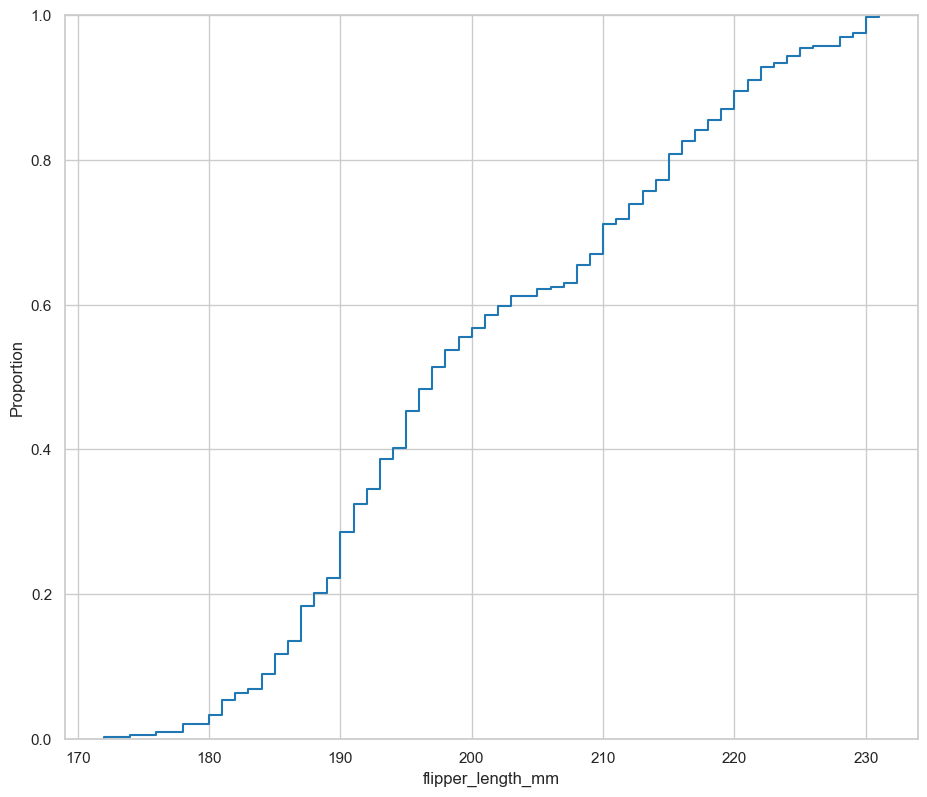

In [97]:
sns.ecdfplot(data=processed_penguins_df, x='flipper_length_mm')

#### Utilizando empiricaldist

In [98]:
cdf_flipper_length = empiricaldist.Cdf.from_seq(processed_penguins_df.flipper_length_mm, normalize=True)

<Axes: xlabel='flipper_length_mm'>

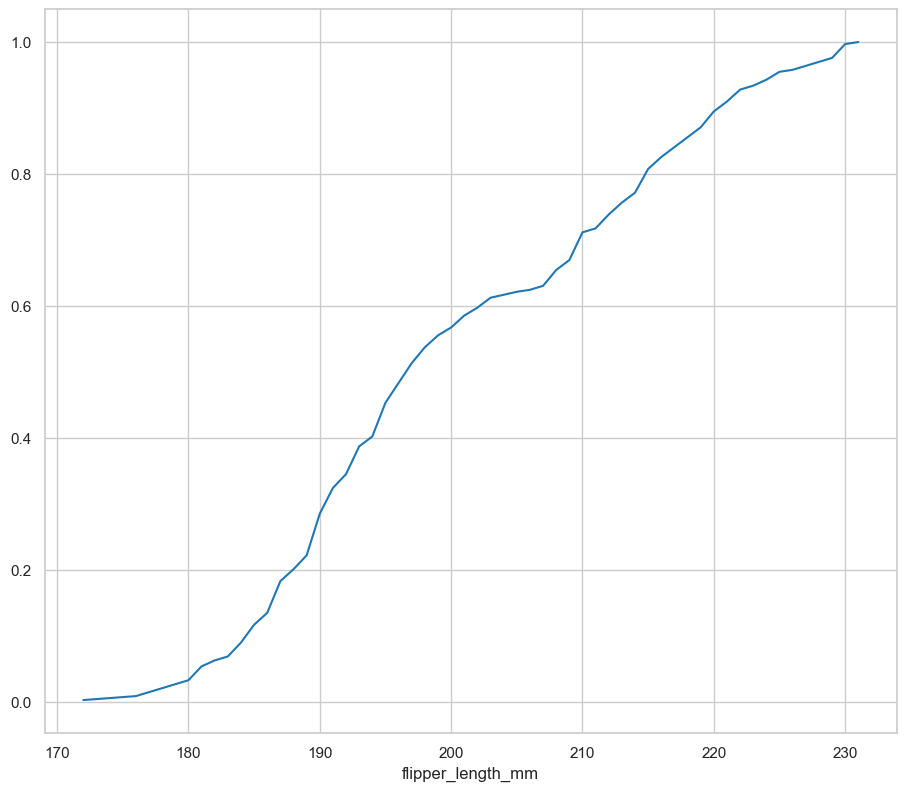

In [99]:
cdf_flipper_length.plot()